# Deep Learning with Keras (TensorFlow backend)

## Import required libraries

Note that tensorflow-gpu on Mac is somewhat buggy, be sure to check online for a solution if TensorFlow does not work straight out of the box.

Fixes for common include setting the .bash_profile, making a symlink of libcuda.dylib to libcuda.1.dylib and/or disabling rootless mode.

CPU-only builds of TensorFlow should work just fine.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# MNIST dataset
from keras.datasets import mnist

Using TensorFlow backend.


## Set parameters / hyperparemeters

In [25]:
batch_size = 128
nb_classes = 10 # Since 10 digits only
nb_epoch = 12 

nb_filters = 32
pool_size = 2, 2
kernel_size = 3, 3

## Import data

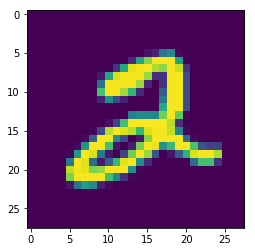

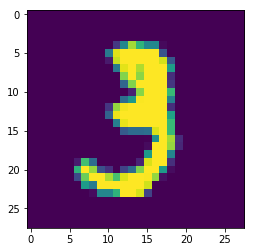

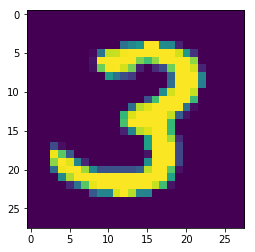

In [26]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

input_shape = (28, 28, 1)

plt.imshow(X_train[5])
plt.show()
plt.imshow(X_train[10])
plt.show()
plt.imshow(X_train[4223])
plt.show()

## Preprocess data

In [27]:
# Reshape data (if theano place the '1's as first argument)

X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1], input_shape[2])

# Other
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

## Build CNN model using Keras

In [28]:
# Keras Sequential API
model = Sequential()

# Add layers to model

# Input layer
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=input_shape))
model.add(Activation('relu'))

# Convolutional layer 1
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# Pooling layer 2
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25)) # Dropout to prevent overfitting
model.add(Flatten())

# Hidden layer 3
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
             optimizer='adadelta', 
             metrics=['accuracy'])

## Run and save model

In [31]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
         verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
model.save('mnist_model.h5')